In [1]:

from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import cm
from math import log
import numpy as np
import pandas as pd 
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
from sklearn.manifold import MDS
exec(compile(open(r"../nsimplices.py", encoding="utf8").read(), "nsimplices.py", 'exec'))

In [2]:
df_gene = pd.read_csv("~/nSimplices/data/sce_full_Darmanis_scScope_top500.csv", index_col=0, header=0)

print(df_gene.shape)
df_gene

(288, 500)


,MALAT1,MAP1B,DPYSL2,HSP90AA1,CALM2,PPP1CB,STMN1,SRSF6,HSPA8,DDX5,...,ZMYM2,ACSL3,ATP6V1A,MIER1,NCOA1,PPIP5K2,RPS13,SAP18,SLTM,CKAP5
GSM1658365,4416,20043,13750,2390,1185,1907,7170,657,1595,209,...,15,0,0,2,27,85,149,414,0,318
GSM1658362,4565,14940,5274,1113,2187,1697,4347,98,979,485,...,0,0,28,222,60,631,42,0,0,118
GSM1658348,4007,11842,6547,1713,1550,1744,4314,1850,769,784,...,41,0,2,458,147,121,95,28,15,173
GSM1658351,8109,22216,4090,148,1567,1118,5029,80,308,1359,...,4,5,0,0,89,121,240,32,82,502
GSM1658352,5160,21624,8265,1190,2431,1196,5364,481,1739,592,...,45,182,255,602,180,36,142,203,75,321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1657983,5273,674,11,1436,1313,491,108,119,337,692,...,130,174,530,1,3,169,60,7,18,32
GSM1657984,7373,455,398,2610,582,276,403,566,97,259,...,307,43,89,0,260,208,0,76,157,104
GSM1657985,14685,1162,419,2881,2124,1378,321,1877,276,453,...,16,52,87,587,1,339,8,171,38,13
GSM1657986,9603,15300,6776,3078,2303,4068,1321,875,3569,828,...,678,484,2477,772,1766,117,8,264,673,2


In [3]:
# preprocess the dataset 
df_array = np.array(df_gene)
gene_meds = np.median(df_array, axis=0)
genes = df_gene.columns.values
gene_meds.shape

(500,)

In [4]:
zipped = zip(gene_meds, genes)
    
# Sort the zipped array based on the values in the first array
sorted_zipped = sorted(zipped, key=lambda x: x[0], reverse=True)

# Unzip the sorted array
sorted_gene_meds, sorted_genes = zip(*sorted_zipped)

med_counts_dict = {}
for gene, med in zip(sorted_genes, sorted_gene_meds):
    med_counts_dict[gene] = med

In [6]:
# only consider the top 50 expressed genes
top_genes = sorted_genes[:500]
# print(top_genes)
df_gene = df_gene.loc[:, top_genes] 

# filter out cells with more than 10 zero counts
delete_indices = []
for index, row in df_gene.iterrows():
    if list(row).count(0) > 100:
        delete_indices.append(index)

df_gene = df_gene.drop(delete_indices)
print(df_gene.shape)
df_gene.to_csv("~/nSimplices/data/sce_full_Darmanis_scScope_top500.csv", header=True, index=True)

(288, 500)


In [7]:
df_gene = pd.read_csv("~/nSimplices/data/sce_full_Darmanis_scScope_top500.csv", index_col=0, header=0)
print(df_gene.shape)

(288, 500)


In [8]:

### Run nSimplices method
feature_num = df_gene.shape[1]
dim_start = 3
dim_end = 3
out_dis = pdist(df_gene)
out_dis_sq = squareform(out_dis)
num_point = df_gene.shape[0]

outlier_indices, subspace_dim, corr_dis_sq, corr_coord = nsimplices(out_dis_sq, feature_num, dim_start, dim_end, euc_coord=np.array(df_gene.copy()), std_multi=1.5)

dim in find_subspace_dim is: 3
med_height is: [12271.334097]
subspace_dim is: 3
thres is: 18179.11109218029 mean is: 13505.571582858016 std is: 3115.6930062148485
outlier indices are: [ 40  43  56  57  59  60  65  66  69  71  77  88  90  91  97  99 100 114
 116 119 120 122 123 127 128 130 133 137 139 144 152 158 162 163 164 165
 194 219 221 223 225 226 232 233 245 272 275 281]
idx is: 40 height is: 21290.404696452882 thres is: 18179.11109218029
idx is: 43 height is: 22929.107016859653 thres is: 18179.11109218029
idx is: 56 height is: 18383.033367789085 thres is: 18179.11109218029
idx is: 57 height is: 23285.35910876545 thres is: 18179.11109218029
idx is: 59 height is: 20477.543321432255 thres is: 18179.11109218029
idx is: 60 height is: 25656.698664692864 thres is: 18179.11109218029
idx is: 65 height is: 19232.760921121564 thres is: 18179.11109218029
idx is: 66 height is: 23301.381207522267 thres is: 18179.11109218029
idx is: 69 height is: 18793.866540550516 thres is: 18179.11109218029


In [9]:
print(outlier_indices)
len(outlier_indices)

[ 40  43  56  57  59  60  65  66  69  71  77  88  90  91  97  99 100 114
 116 119 120 122 123 127 128 130 133 137 139 144 152 158 162 163 164 165
 194 219 221 223 225 226 232 233 245 272 275 281]


48

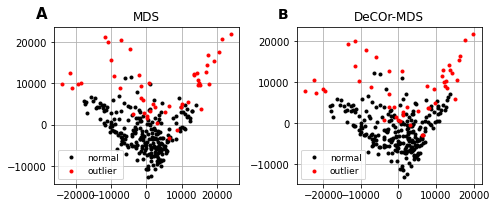

In [13]:
normal_indices=[i for i in range(num_point) if i not in outlier_indices] # list of normal points 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,3))



# plot original graphs with outliers added 
va, ve, Xe = cMDS(out_dis_sq)
ax1.plot(Xe[normal_indices,0],Xe[normal_indices,1],'.', color='black', label="normal")
ax1.plot(Xe[outlier_indices,0],Xe[outlier_indices,1],'.',color='red', label="outlier")
ax1.legend(fontsize=9)
ax1.grid()
ax1.set_title("MDS")
ax1.text(-0.1, 1.05, 'A', transform=ax1.transAxes, 
        size=15, weight='bold')

# plot correct outliers 
va, ve, Xe = cMDS(corr_dis_sq)   
ax2.plot(Xe[normal_indices,0],Xe[normal_indices,1],'.', color='black', label="normal")
ax2.plot(Xe[outlier_indices,0],Xe[outlier_indices,1],'.',color='red', label="outlier")
ax2.legend(fontsize=9)
ax2.set_title("DeCOr-MDS")
ax2.text(-0.1, 1.05, 'B', transform=ax2.transAxes, 
        size=14, weight='bold')
ax2.grid()
plt.tight_layout()
fig_path =  "../outputs/Darmanis_MDS_xy.pdf"
plt.savefig(fig_path)
plt.show()
plt.close()

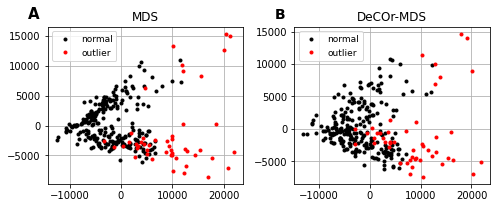

In [41]:
normal_indices=[i for i in range(num_point) if i not in outlier_indices] # list of normal points 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,3))



# plot original graphs with outliers added 
va, ve, Xe = cMDS(out_dis_sq)
ax1.plot(Xe[normal_indices,1],Xe[normal_indices,2],'.', color='black', label="normal")
ax1.plot(Xe[outlier_indices,1],Xe[outlier_indices,2],'.',color='red', label="outlier")
ax1.legend(fontsize=9)
ax1.grid()
ax1.set_title("MDS")
ax1.text(-0.1, 1.05, 'A', transform=ax1.transAxes, 
        size=15, weight='bold')

# plot correct outliers 
va, ve, Xe = cMDS(corr_dis_sq)   
ax2.plot(Xe[normal_indices,1],-Xe[normal_indices,2],'.', color='black', label="normal")
ax2.plot(Xe[outlier_indices,1],-Xe[outlier_indices,2],'.',color='red', label="outlier")
ax2.legend(fontsize=9)
ax2.set_title("DeCOr-MDS")
ax2.text(-0.1, 1.05, 'B', transform=ax2.transAxes, 
        size=14, weight='bold')
ax2.grid()
plt.tight_layout()
fig_path =  "../outputs/Darmanis_MDS_yz.pdf"
plt.savefig(fig_path)
plt.show()
plt.close()

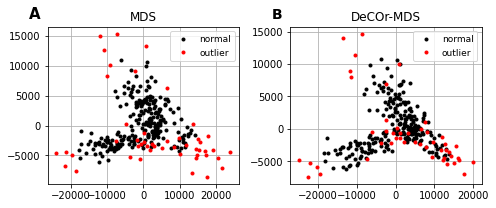

In [42]:
normal_indices=[i for i in range(num_point) if i not in outlier_indices] # list of normal points 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,3))



# plot original graphs with outliers added 
va, ve, Xe = cMDS(out_dis_sq)
ax1.plot(Xe[normal_indices,0],Xe[normal_indices,2],'.', color='black', label="normal")
ax1.plot(Xe[outlier_indices,0],Xe[outlier_indices,2],'.',color='red', label="outlier")
ax1.legend(fontsize=9)
ax1.grid()
ax1.set_title("MDS")
ax1.text(-0.1, 1.05, 'A', transform=ax1.transAxes, 
        size=15, weight='bold')

# plot correct outliers 
va, ve, Xe = cMDS(corr_dis_sq)   
ax2.plot(Xe[normal_indices,0],-Xe[normal_indices,2],'.', color='black', label="normal")
ax2.plot(Xe[outlier_indices,0],-Xe[outlier_indices,2],'.',color='red', label="outlier")
ax2.legend(fontsize=9)
ax2.set_title("DeCOr-MDS")
ax2.text(-0.1, 1.05, 'B', transform=ax2.transAxes, 
        size=14, weight='bold')
ax2.grid()
plt.tight_layout()
fig_path =  "../outputs/Darmanis_MDS_xz.pdf"
plt.savefig(fig_path)
plt.show()
plt.close()

In [40]:
# 3D plot

from plotly.subplots import make_subplots
import plotly.graph_objects as go

outlier_inds = np.zeros(df_gene.shape[0])
outlier_inds[outlier_indices] = 1

fig = make_subplots(rows=1, cols=2, 
                    specs=[[{'type': 'scene'}, {'type': 'scene'}]],
                    subplot_titles=('MDS',  'DeCOr-MDS'))

va, ve, Xe = cMDS(out_dis_sq)

# fig.add_trace(
#     go.Scatter3d(x=Xe[normal_indices, 0], y=[normal_indices, 1], z=Xe[normal_indices, 2], mode='markers', \
#                  marker=dict(size=3, color='yellow')),
#         row=1, col=1)



fig.add_trace(
    go.Scatter3d(x=Xe[normal_indices, 0], y=Xe[normal_indices, 1], z=Xe[normal_indices, 2], mode='markers', name = "normal", marker=dict(size=3, color='blue')),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=Xe[outlier_indices, 0], y=Xe[outlier_indices, 1], z=Xe[outlier_indices, 2], mode='markers', name = "outlier", marker=dict(size=3, color='red')),
    row=1, col=1
)

va, ve, Xe = cMDS(corr_dis_sq)   
fig.add_trace(
    go.Scatter3d(x=Xe[normal_indices, 0], y=Xe[normal_indices, 1], z=-Xe[normal_indices, 2], mode='markers', name = "normal", marker=dict(size=3, color='blue')),
    row=1, col=2
)

fig.add_trace(
    go.Scatter3d(x=Xe[outlier_indices, 0], y=Xe[outlier_indices, 1], z=-Xe[outlier_indices, 2], mode='markers', name = "outlier", marker=dict(size=3, color='red')),
    row=1, col=2
)

# fig.update_layout(height=600, width=800, title_text="Side By Side Subplots")
fig.show()
fig_path = "../outputs/Darmanis_MDS_3D.html"
fig.write_html(fig_path)

In [51]:
# examine the gene expression count profile
def is_percent_greater(lst, value):
    # Count the number of elements greater than the value
    count_greater = sum(1 for element in lst if element > value)
    
    # Calculate the percentage
    percentage = (count_greater / len(lst)) * 100
    
    # Check if the percentage is greater than or equal to 80%
    return (percentage >= 70)


In [52]:
box_plot_dict = {}
top_greater_genes = []
for gene in top_genes:
    outlier_counts = list(df_gene.iloc[outlier_indices][gene])
    # print(len(counts), counts, med_counts_dict[gene])
    if is_percent_greater(outlier_counts, med_counts_dict[gene]):
        counts =  list(df_gene[gene])
        box_plot_dict[gene] = counts
        top_greater_genes.append(gene)


In [53]:
len(top_greater_genes)

2

In [54]:
outlier_x = []
outlier_y = []
for index in outlier_indices:
    for gene in top_greater_genes:
        gene_index = top_greater_genes.index(gene)+1
        outlier_x.append(gene_index)
        outlier_gene_count = df_gene.iloc[index][gene]
        outlier_y.append(outlier_gene_count)


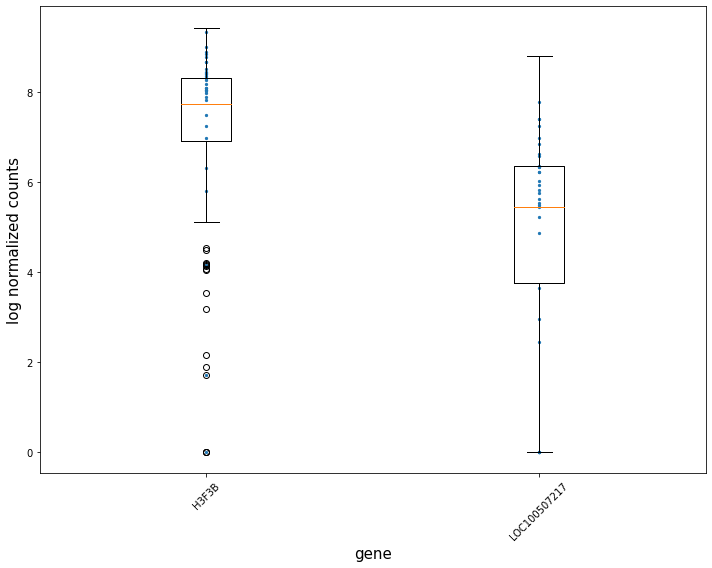

In [55]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)
label_size = 15
ax.boxplot(box_plot_dict.values())
ax.set_xticklabels(box_plot_dict.keys())
plt.scatter(x=outlier_x, y=outlier_y, s=5)
ax.tick_params(axis='x', rotation=45)
plt.xlabel("gene", fontsize=label_size)
plt.xticks(fontsize=10)
plt.ylabel("log normalized counts", fontsize=label_size)
plt.yticks(fontsize=10)
plt.tight_layout()
figpath = "../outputs/Darmanis_box_plot.pdf"
plt.savefig(figpath)
plt.show()

